### Checkpoint 1: Data Cleaning 1


### Load the companies and rounds data (provided on the previous page) into two data frames and name them companies and rounds2 respectively.



In [839]:
import pandas as pd
companies  = pd.read_csv('C:/Users/DK/Desktop/upgrad/learning/MainCourse/EDA/assignment1/companies.csv', encoding='palmos')
rounds2 = pd.read_csv('C:/Users/DK/Desktop/upgrad/learning/MainCourse/EDA/assignment1/rounds2.csv', encoding='palmos')


#### How many unique companies are present in rounds2?	


In [840]:
rounds2['company_permalink'].str.lower().nunique()

66368

#### How many unique companies are present in companies?	

In [841]:
companies['permalink'].str.lower().nunique()

66368

#### Are there any companies in the rounds2 file which are not present in companies?

In [842]:
data = rounds2[~(rounds2['company_permalink'].str.lower().isin(companies['permalink'].str.lower()))]

In [843]:
data.size

0

#### In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.	
Ans : Permalink

#### Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

Before merging , make all coulms as same case

In [844]:
companies['permalink'] = companies['permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [845]:
rounds2.shape

(114949, 6)

In [846]:
companies.shape

(66368, 10)

In [847]:
master_frame = pd.merge(companies, rounds2,how='outer',left_on='permalink',right_on='company_permalink')

In [848]:
master_frame.shape

(114949, 16)

since we have two permalink removing one

In [849]:
master_frame = master_frame.drop('permalink', axis=1)

Checking the data type 

In [850]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   name                     114948 non-null  object 
 1   homepage_url             108815 non-null  object 
 2   category_list            111539 non-null  object 
 3   status                   114949 non-null  object 
 4   country_code             106271 non-null  object 
 5   state_code               104003 non-null  object 
 6   region                   104782 non-null  object 
 7   city                     104785 non-null  object 
 8   founded_at               94428 non-null   object 
 9   company_permalink        114949 non-null  object 
 10  funding_round_permalink  114949 non-null  object 
 11  funding_round_type       114949 non-null  object 
 12  funding_round_code       31140 non-null   object 
 13  funded_at                114949 non-null  object 
 14  rais

Validating missing columns

In [851]:
master_frame.isnull().sum()

name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [852]:
round((100*(master_frame.isnull().sum()) / len(master_frame.index)),2)

name                       0.00
homepage_url               5.34
category_list              2.97
status                     0.00
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
dtype: float64

In [853]:
#master_frame = master_frame.drop('funding_round_code', axis=1)
round((100*(master_frame.isnull().sum()) / len(master_frame.index)),2)

name                       0.00
homepage_url               5.34
category_list              2.97
status                     0.00
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
dtype: float64

funding_round_code has more number of null values as it dont have any impact on buisness requirement not dropping them .
As raised amount usd is used in the buisness logic, dropiing those which has missing values

In [854]:
master_frame = master_frame.dropna(axis=0, subset=['raised_amount_usd'])
round((100*(master_frame.isnull().sum()) / len(master_frame.index)),2)

name                       0.00
homepage_url               4.56
category_list              1.10
status                     0.00
country_code               6.16
state_code                 8.01
region                     7.42
city                       7.42
founded_at                16.81
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        70.34
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

## Checkpoint 2: Funding Type Analysis


### Validating funding type columns and performing analsysis on top of it

In [855]:
master_frame['funding_round_type'].value_counts()

venture                  50228
seed                     23603
debt_financing            6682
angel                     4860
grant                     2124
private_equity            1936
undisclosed               1582
convertible_note          1447
equity_crowdfunding       1228
post_ipo_equity            628
product_crowdfunding       386
post_ipo_debt              152
non_equity_assistance       73
secondary_market            30
Name: funding_round_type, dtype: int64

In [856]:
representativeValue = master_frame[(master_frame['funding_round_type'] == 'venture') | (master_frame['funding_round_type'] == 'angel') | (master_frame['funding_round_type'] == 'seed')  | (master_frame['funding_round_type'] == 'private_equity') ]

In [857]:
representativeValue['funding_round_type'].value_counts()

venture           50228
seed              23603
angel              4860
private_equity     1936
Name: funding_round_type, dtype: int64

In [858]:
representativeValue1 = representativeValue.groupby(by='funding_round_type')['raised_amount_usd'].mean().sort_values(ascending = False).astype('float32')
representativeValue1 = representativeValue1.reset_index()

representativeValue1.head()

,funding_round_type,raised_amount_usd
0,private_equity,73308592.00
1,venture,11748949.00
2,angel,958694.50
3,seed,719818.00


#### Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for it? Identify the investment type and, for further analysis, filter the data so it only contains the chosen investment type.



In [859]:
representativeValue1 = representativeValue1[(representativeValue1['raised_amount_usd'] >= 5000000.00 ) & (representativeValue1['raised_amount_usd'] <= 15000000.00 )]
representativeValue = representativeValue[(representativeValue['raised_amount_usd'] >= 5000000.00 ) & (representativeValue['raised_amount_usd'] <= 15000000.00 )]

In [860]:
representativeValue1.head()

,funding_round_type,raised_amount_usd
1,venture,11748949.00


### Checkpoint 3: Country Analysis


In [861]:
representativeValue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17302 entries, 0 to 114936
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     17302 non-null  object 
 1   homepage_url             16374 non-null  object 
 2   category_list            17095 non-null  object 
 3   status                   17302 non-null  object 
 4   country_code             16558 non-null  object 
 5   state_code               16304 non-null  object 
 6   region                   16364 non-null  object 
 7   city                     16366 non-null  object 
 8   founded_at               14281 non-null  object 
 9   company_permalink        17302 non-null  object 
 10  funding_round_permalink  17302 non-null  object 
 11  funding_round_type       17302 non-null  object 
 12  funding_round_code       11700 non-null  object 
 13  funded_at                17302 non-null  object 
 14  raised_amount_usd    

In [862]:
representativeValue['raised_amount_usd'].value_counts()

10000000.00    1869
5000000.00     1825
15000000.00    1119
6000000.00     1014
8000000.00      880
               ... 
9776044.00        1
8727199.00        1
13970000.00       1
5149987.00        1
9961962.00        1
Name: raised_amount_usd, Length: 3018, dtype: int64

In [863]:
pd.options.display.float_format = '{:.2f}'.format

top9 = representativeValue.loc[(representativeValue['funding_round_type'] == 'venture')]
top9.groupby(['country_code'])['raised_amount_usd'].sum().sort_values(ascending=False).head(n=9)

country_code
USA   108531347515.00
GBR     5436843539.00
CHN     5016561053.00
CAN     3647009578.00
IND     2976543602.00
ISR     2840305951.00
FRA     2112425453.00
DEU     1765026223.00
SWE      655040681.00
Name: raised_amount_usd, dtype: float64

CHN is not an english speaking country , hence we need to ignore it

### Checkpoint 4: Sector Analysis 1


In [864]:
mapping = pd.read_csv('C:/Users/DK/Desktop/upgrad/learning/MainCourse/EDA/assignment1/mapping.csv', encoding='palmos')

Extract the primary sector of each category list from the category_list column



In [865]:
top9['primary_sector'] = top9['category_list'].apply(lambda x : str(x))
top9['primary_sector'] = top9['primary_sector'].apply(lambda x : x.split('|'))
top9['primary_sector'] = top9['primary_sector'].apply(lambda x : x[0])


C:\Users\DK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\DK\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DK\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [866]:
top9.head()

,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,Media
12,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.00,Analytics
22,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.00,Apps
46,ZenChef,http://zenchef.com/en/,Local Businesses|Restaurants,operating,FRA,A8,Paris,Paris,20-11-2010,/organization/1001-menus,/funding-round/645b4cd895450b8e0268027cd7813047,venture,B,04-11-2015,6602694.00,Local Businesses
50,1001pharmacies.com,http://www.1001pharmacies.com/,Cosmetics|Marketplaces,operating,FRA,A9,Montpellier,Montpellier,01-01-2012,/organization/1001pharmacies-com,/funding-round/a21fc4d20200f43e3a25fd9cfc7c1482,venture,A,09-07-2015,8900000.00,Cosmetics


Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)



In [867]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


Dropping null values and blank column in Mapping dataset , as it has no meaning in the buisness logic

In [868]:
mapping = mapping.drop(columns="Blanks")
mapping['category_list'].dropna()

1                    3D
2           3D Printing
3         3D Technology
4            Accounting
5      Active Lifestyle
             ...       
683           Wholesale
684    Wine And Spirits
685            Wireless
686               Women
687        Young Adults
Name: category_list, Length: 687, dtype: object

#### Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [869]:
mainsector = mapping.melt(id_vars="category_list",var_name="main_sector")
mainsector = mainsector[~(mainsector['value'] == 0)]
mainsector = mainsector.drop(columns="value")
mainsector.head()
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Cleantech / Semiconductors               688 non-null    int64 
 3   Entertainment                            688 non-null    int64 
 4   Health                                   688 non-null    int64 
 5   Manufacturing                            688 non-null    int64 
 6   News, Search and Messaging               688 non-null    int64 
 7   Others                                   688 non-null    int64 
 8   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 48.5+ KB


In [870]:
(mainsector['main_sector'] == 'Blanks').value_counts()

False    687
Name: main_sector, dtype: int64

In [871]:
(mainsector['category_list'].isnull()).value_counts()

False    687
Name: category_list, dtype: int64

In [872]:
scetoranalysisdata1 = pd.merge(top9,mainsector,how='inner',left_on='primary_sector',right_on='category_list')
scetoranalysisdata1.head()

,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector
0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,Media,Media,Entertainment
1,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,Media,Media,Entertainment
2,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,Media,Media,Entertainment
3,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,Media,Media,Entertainment
4,The Speedel Group,http://www.speedelgroup.com/,Media,closed,CHE,4,Basel,Basel,NaN,/organization/basel-switzerland,/funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2,venture,NaN,07-01-2002,13439178.00,Media,Media,Entertainment


### Checkpoint 5: Sector Analysis 2


splitting data country wise and calculating total number of investments

In [883]:
scetoranalysisdata1 = scetoranalysisdata1[(scetoranalysisdata1['raised_amount_usd'] >= 5000000.00 ) & (scetoranalysisdata1['raised_amount_usd'] <= 15000000.00 )]


USAData = scetoranalysisdata1[(scetoranalysisdata1['country_code'] == 'USA')]
GBRData = scetoranalysisdata1[(scetoranalysisdata1['country_code'] == 'GBR')]
INDData = scetoranalysisdata1[(scetoranalysisdata1['country_code'] == 'IND')]
len(USAData)

11149

### Country wise investment in top sector count wise

### NOTE : OTHERS HAS MANY SECTORS INCLUDED , WHICH HAS NO DEFINITE SECTOR , SO OTHERS WAS EXCLUDED FROM THE TOP SECTOR LIST

In [874]:
USAData.groupby(['main_sector'])['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     2923
Cleantech / Semiconductors                 2297
Social, Finance, Analytics, Advertising    1912
News, Search and Messaging                 1563
Health                                      908
Manufacturing                               799
Entertainment                               580
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [875]:
GBRData.groupby(['main_sector'])['main_sector'].count().sort_values(ascending=False)

main_sector
Others                                     143
Cleantech / Semiconductors                 127
Social, Finance, Analytics, Advertising     98
News, Search and Messaging                  73
Entertainment                               54
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: main_sector, dtype: int64

In [876]:
INDData.groupby(['main_sector'])['main_sector'].count().sort_values(ascending=False)

main_sector
Others                                     109
News, Search and Messaging                  52
Entertainment                               33
Social, Finance, Analytics, Advertising     32
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: main_sector, dtype: int64

splitting data country wise and calculating total amount of investments

In [877]:
USAData['raised_amount_usd'].sum()

99661524549.0

In [878]:
GBRData['raised_amount_usd'].sum()

5028704358.0

In [879]:
INDData['raised_amount_usd'].sum()

2683537552.0

In [880]:
len(USAData)

11149

### Country USA

In [881]:
#Total no. of investments
print("Total no. of Investments: ",USAData['raised_amount_usd'].count())

#Total amount of investments
print("Total amount of Investments: ",USAData['raised_amount_usd'].sum())


Total no. of Investments:  11149
Total amount of Investments:  99661524549.0


### Country GBR

In [882]:
#Total no. of investments
print("Total no. of Investments: ",GBRData['raised_amount_usd'].count())

#Total amount of investments
print("Total amount of Investments: ",GBRData['raised_amount_usd'].sum())


Total no. of Investments:  577
Total amount of Investments:  5028704358.0


### Country IND

In [810]:
#Total no. of investments
print("Total no. of Investments: ",INDData['raised_amount_usd'].count())

#Total amount of investments
print("Total amount of Investments: ",INDData['raised_amount_usd'].sum())


Total no. of Investments:  299
Total amount of Investments:  2683537552.0


#### For point 3 (top sector count-wise), which company received the highest investment?
### USA

In [811]:
USAData.loc[USAData['main_sector']=='Cleantech / Semiconductors'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False)


company_permalink
/organization/tigo-energy               8
/organization/biodesix                  8
/organization/forsight-labs             7
/organization/metabolon                 6
/organization/scienergy                 6
                                       ..
/organization/nativis                   1
/organization/nautilus-neurosciences    1
/organization/naviscan                  1
/organization/neochord                  1
/organization/1bog                      1
Name: raised_amount_usd, Length: 1582, dtype: int64

### GBR

In [812]:
GBRData.loc[GBRData['main_sector']=='Cleantech / Semiconductors'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False)

company_permalink
/organization/eusa-pharma                                                      3
/organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h    3
/organization/horizon-discovery                                                3
/organization/immune-targeting-systems                                         2
/organization/microemissive-displays-group                                     2
                                                                              ..
/organization/onyvax                                                           1
/organization/oxford-immunotec                                                 1
/organization/phagenesis                                                       1
/organization/phosphate-therapeutics                                           1
/organization/abcodia                                                          1
Name: raised_amount_usd, Length: 104, dtype: int64

### IND

In [813]:
INDData.loc[INDData['main_sector']=='News, Search and Messaging'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False)

company_permalink
/organization/gupshup-technology-india-pvt-ltd    3
/organization/roadrunnr                           2
/organization/sms-gupshup                         2
/organization/imimobile                           2
/organization/hike                                2
/organization/guruji                              2
/organization/quikr-india                         2
/organization/matrimony-com                       2
/organization/bluestone-com                       2
/organization/easylink                            1
/organization/culturealley                        1
/organization/ezetap                              1
/organization/localoye                            1
/organization/fourinteractive                     1
/organization/chillr-2                            1
/organization/chakpak-media                       1
/organization/bharat-matrimony                    1
/organization/belong                              1
/organization/jugnoo                          

### For point 4 (second best sector count-wise), which company received the highest investment?
### USA

In [814]:
USAData.loc[USAData['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False)

company_permalink
/organization/yume            6
/organization/choicestream    6
/organization/instamed        6
/organization/univa           5
/organization/owneriq         5
                             ..
/organization/nimblefish      1
/organization/nile-guide      1
/organization/ngame           1
/organization/nextmedium      1
/organization/21e6            1
Name: raised_amount_usd, Length: 1301, dtype: int64

### GBR

In [815]:
GBRData.loc[GBRData['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False)

company_permalink
/organization/celltick-technologies    4
/organization/mythings                 4
/organization/imagini                  3
/organization/amplience                3
/organization/victor                   3
                                      ..
/organization/mirriad                  1
/organization/metail                   1
/organization/memrise                  1
/organization/wunderloop               1
/organization/365scores                1
Name: raised_amount_usd, Length: 77, dtype: int64

### IND

In [816]:
INDData.loc[INDData['main_sector']=='Entertainment'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False)

company_permalink
/organization/yebhi                               2
/organization/yatra-online                        2
/organization/apalya                              2
/organization/cleartrip                           2
/organization/collectabillia-com                  2
/organization/games2win                           2
/organization/holidayiq-com                       2
/organization/zomato                              1
/organization/moonfrog-labs                       1
/organization/adlabs-imagica                      1
/organization/chef-s-basket                       1
/organization/dhruva                              1
/organization/freecultr                           1
/organization/livspace                            1
/organization/nykaa                               1
/organization/zivame-com                          1
/organization/octro-2                             1
/organization/pokkt                               1
/organization/smartairtrip                    

### Checkpoint 6: Plots

A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   



In [817]:
plotData = master_frame[(master_frame['funding_round_type'] == 'venture') | (master_frame['funding_round_type'] == 'angel') | (master_frame['funding_round_type'] == 'seed')  | (master_frame['funding_round_type'] == 'private_equity') ]

In [818]:
plot1 = plotData.groupby(['funding_round_type'])['raised_amount_usd'].sum()

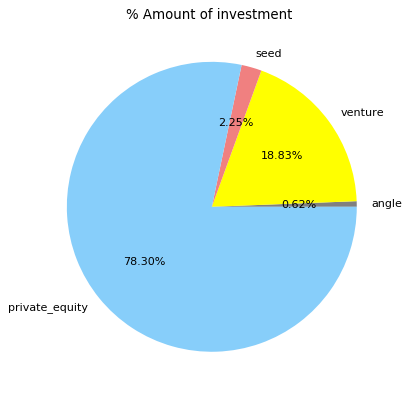

In [819]:
import matplotlib.pyplot as pt
from matplotlib.pyplot import figure 
figure(figsize=(8, 6), dpi=80)

labels = 'angle', 'venture', 'seed', 'private_equity'
colors = ['grey', 'yellow', 'lightcoral', 'lightskyblue']
pt.title('% Amount of investment ')

pt.pie(plot1, labels=labels, colors=colors,autopct='%1.2f%%')
pt.show()

A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.                        

In [820]:
plot2 = plotData.groupby(['country_code'])['raised_amount_usd'].sum().sort_values(ascending=False).head(n=10)
plot2.head()

country_code
USA   511268539172.00
CHN    61497415923.00
GBR    27167554378.00
IND    21331618815.00
CAN    13271109812.00
Name: raised_amount_usd, dtype: float64

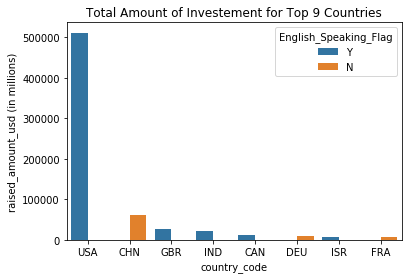

In [821]:
ES_Country=pd.DataFrame({'country_code': ['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'],
                        'English_Speaking_Flag': ['Y','N','Y','Y','Y','N','Y','N','N']})
plot2 = pd.merge(plot2,ES_Country,how='inner',on='country_code')
plot2 = plot2.head(n=9)
sns.barplot(x=plot2['country_code'],y=plot2['raised_amount_usd']/1000000,hue=plot2['English_Speaking_Flag'],ci=None)
pt.ylabel("raised_amount_usd (in millions)")
pt.title("Total Amount of Investement for Top 9 Countries") 
pt.show()


A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.



In [822]:
plot3_1 = USAData.groupby(['main_sector'])['raised_amount_usd'].sum().sort_values(ascending=False).head(n=4).reset_index(inplace=False)
plot3_1['Country'] = 'USA'
plot3_2 = GBRData.groupby(['main_sector'])['raised_amount_usd'].sum().sort_values(ascending=False).head(n=4).reset_index(inplace=False)
plot3_2['Country'] = 'GBR'
plot3_3 = INDData.groupby(['main_sector'])['raised_amount_usd'].sum().sort_values(ascending=False).head(n=4).reset_index(inplace=False)
plot3_3['Country'] = 'IND'
#plot3_1.reset_index(inplace=False)


In [823]:

plot3 = pd.merge(plot3_1, plot3_2,how='outer')
plot3 = pd.merge(plot3,plot3_3,how='outer')

In [824]:
plot3

,main_sector,raised_amount_usd,Country
0,Others,26089280296.00,USA
1,Cleantech / Semiconductors,21181003033.00,USA
2,"Social, Finance, Analytics, Advertising",16680695048.00,USA
3,"News, Search and Messaging",13796816094.00,USA
4,Others,1249124289.00,GBR
5,Cleantech / Semiconductors,1136905008.00,GBR
6,"Social, Finance, Analytics, Advertising",821888357.00,GBR
7,"News, Search and Messaging",615746235.00,GBR
8,Others,1007409507.00,IND
9,"News, Search and Messaging",433834545.00,IND


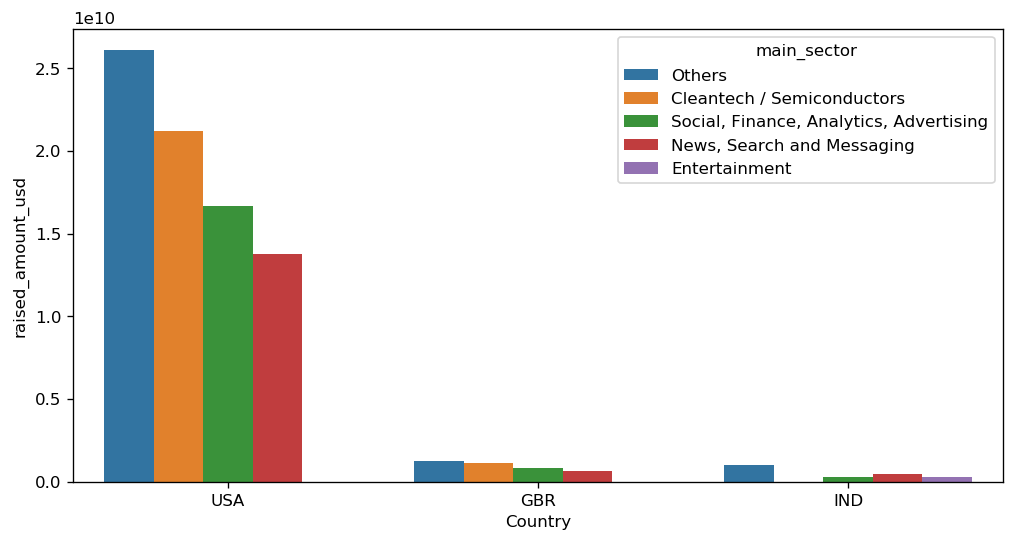

In [825]:
pt.figure(figsize=[10.0,5.0],dpi=120,frameon=True)

sns.barplot(x='Country', y='raised_amount_usd', hue='main_sector',data=plot3)